In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

In [18]:
xgrid, ygrid = torch.meshgrid(torch.arange(0, 10, 0.5), torch.arange(0, 10, 0.5))
grid = torch.cat((xgrid.flatten().unsqueeze(0), ygrid.flatten().unsqueeze(0)), dim=0)
grid.shape

torch.Size([2, 400])

In [29]:
crds0 = torch.rand((4, 2)) * 8
crds = crds0.clone()

In [30]:
crds = crds0.clone()

In [31]:
for i in range(3):
    crds = torch.cat((crds, crds0 + torch.normal(0.4, 0.4, (4, 2)) * torch.sign(torch.randint(-1, 1, (4,2)))) , dim=0)

In [32]:
crd_around = grid.T[torch.any(torch.cdist(grid.T, crds) < 0.75, dim=1)]
crd_around_idx = torch.nonzero(torch.any(torch.cdist(grid.T, crds) < 0.75, dim=1))
A = (torch.cdist(crd_around, crd_around, p=1) <= 0.5).double()

In [33]:
# labels = torch.zeros(grid.shape[1])
# labels[crd_around_idx] = 1
# print(torch.all(crd_around_idx == torch.nonzero(labels)))

In [34]:
n_components, labels = connected_components(csgraph=csr_matrix(A), directed=False, return_labels=True)
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [35]:
labels_unique, labels_count = torch.unique(torch.tensor(labels), return_counts=True)
labels_count_good = (labels_count > 10)

In [36]:
crd_around_cleaned = grid.T[crd_around_idx[labels_count_good[labels]].squeeze()]

In [37]:
crd_around_cleaned.shape

torch.Size([27, 2])

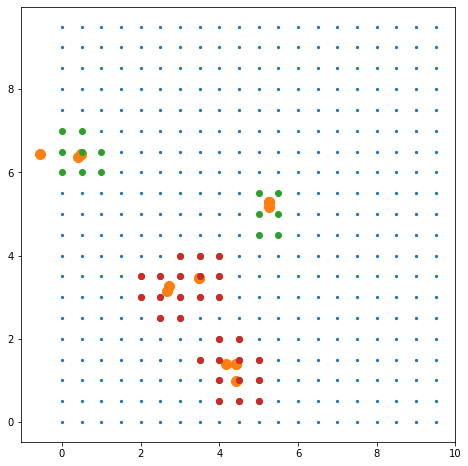

In [38]:
plt.scatter(grid[0], grid[1], s=5)
plt.scatter(crds[:, 0], crds[:, 1], s=100)
plt.scatter(crd_around[:, 0], crd_around[:, 1])
# plt.scatter(crd_around[:, 0], crd_around[:, 1], c=labels)
plt.scatter(crd_around_cleaned[:, 0], crd_around_cleaned[:, 1])
plt.gca().set_box_aspect(1)
plt.gcf().set_size_inches(8, 8)
